In [ ]:
from google.colab import files
uploaded=files.upload()

Saving twitter_sentiment_data.csv to twitter_sentiment_data.csv


Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download the 'punkt' tokenizer models
nltk.download('punkt')

# Load the CSV file
data = pd.read_csv('twitter_sentiment_data.csv')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the 'message' column
data['message'] = data['message'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentiment Analysis


In [ ]:
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [ ]:
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)

    # Determine sentiment label based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
# Load Twitter data CSV file
data = pd.read_csv('twitter_sentiment_data.csv')

# Apply sentiment analysis to the 'message' column and store the results in a new column
data['sentiment'] = data['message'].apply(analyze_sentiment)


Display the results

In [ ]:
# Display the first few rows of the DataFrame with sentiment analysis results
data.head(10)


,sentiment,message,tweetid
0,Positive,@tiniebeany climate change is an interesting h...,792927353886371840
1,Neutral,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Positive,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Positive,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,Negative,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,Positive,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,Negative,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,Neutral,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,Positive,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,Neutral,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


In [ ]:
# Import additional libraries for displaying results
import ipywidgets as widgets
from IPython.display import clear_output

# Create a text widget for displaying results
result_text = widgets.Output()
display(result_text)

# Define a function to update the dashboard with results
def update_dashboard(sentiment):
    filtered_data = data[data['sentiment'] == sentiment]
    with result_text:
        clear_output()
        display(filtered_data)

# Create widgets for sentiment selection
sentiment_selector = widgets.Dropdown(
    options=['Positive', 'Negative', 'Neutral'],
    value='Positive',
    description='Sentiment:',
    disabled=False,
)

# Define a function to update the dashboard when the sentiment is changed
def on_sentiment_change(change):
    update_dashboard(change.new)

sentiment_selector.observe(on_sentiment_change, names='value')

# Display the widgets and initial dashboard
display(sentiment_selector)
update_dashboard(sentiment_selector.value)


Output()

Dropdown(description='Sentiment:', options=('Positive', 'Negative', 'Neutral'), value='Positive')

In [ ]:
# Save the DataFrame with sentiment analysis results to a new CSV file
data.to_csv('twitter_sentiment_results.csv', index=False)


In [ ]:
result_text = widgets.Output()
display(result_text)

# Define a function to update the dashboard
def update_dashboard(selection):
    if selection.isdigit():
        tweet_id = int(selection)
        tweet_data = data[data['tweetid'] == tweet_id]

        if not tweet_data.empty:
            with result_text:
                clear_output()
                display(tweet_data)

            sentiment = tweet_data.iloc[0]['sentiment']

        else:
            with result_text:
                clear_output()
                print(f"Tweet with ID {tweet_id} not found.")
    else:
        with result_text:
            clear_output()
            print("Please enter a valid Tweet ID (numeric value).")

# Create an input widget for entering Tweet ID
tweet_id_input = widgets.Text(
    value='',
    description='Tweet ID:',
    disabled=False
)

# Create a button for triggering the search
search_button = widgets.Button(description="Search")

# Define a function to handle the search button click
def on_search_button_click(b):
    tweet_id = tweet_id_input.value
    update_dashboard(tweet_id)

search_button.on_click(on_search_button_click)

# Display the input, search button, and initial dashboard
display(tweet_id_input, search_button)

Output()

Text(value='', description='Tweet ID:')

Button(description='Search', style=ButtonStyle())

# Implementing SVM and Naive Bayes models for sentiment analysis and show accuracy, confusion matrix, and their visualizations

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
data = pd.read_csv('twitter_sentiment_data.csv')


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['sentiment'], test_size=0.2, random_state=42)



# we need to convert text data into numerical features that can be used by machine learning algorithms (TF-IDF Vectorization).

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # The number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# SVM Model
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [ ]:
# Naive Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)

# print accurancy results

In [ ]:
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')

SVM Accuracy: 0.74
Naive Bayes Accuracy: 0.68


In [ ]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix for SVM:")
print(svm_cm)

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
print("\nConfusion Matrix for Naive Bayes:")
print(nb_cm)


Confusion Matrix for SVM:
[[ 383  114  237   50]
 [  58  696  705  123]
 [  54  211 3968  281]
 [   7   42  413 1447]]

Confusion Matrix for Naive Bayes:
[[ 179   76  479   50]
 [  16  361 1114   91]
 [   8   76 4225  205]
 [   3   15  659 1232]]


# Visualize the confusion matrices for the two models

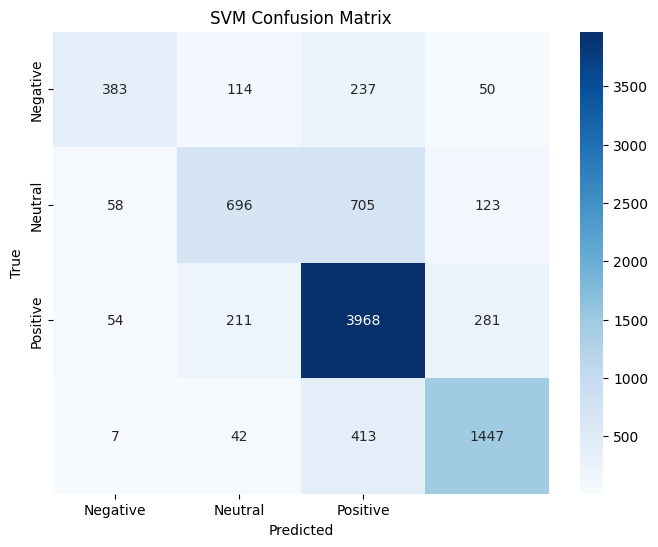

In [ ]:
# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

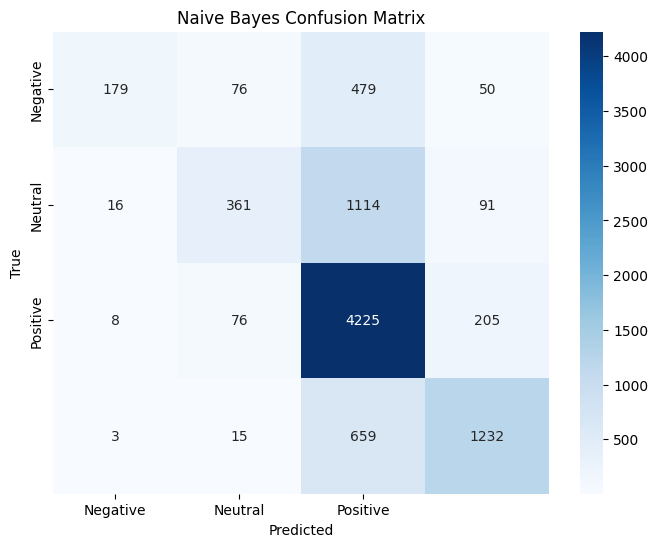

In [ ]:
# Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')
plt.show()